In [23]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

In [20]:
df = pd.read_pickle('./Pickles/modeling_df.pkl')
grx_df = pd.read_pickle('./Pickles/grx_df.pkl')
nadac_year_df = pd.read_pickle('nadac_year_df.pkl')
cdf = pd.read_pickle('./Pickles/linreg_cdf.pkl')

In [16]:
len(grx_df)

3442

In [18]:
len(modeling_df)

1034

In [9]:
df.columns

Index(['drug_name', 'generic_name', 'grx_lowest_price', 'grx_pharmacy',
       'grx_purchase', 'grx_lowest_price_adj'],
      dtype='object')

In [38]:
df.head()

,drug_name,generic_name,grx_lowest_price,grx_pharmacy,grx_purchase,grx_lowest_price_adj,chem_name,affected_organisms,chem_state,chem_class,...,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,chem_sub_class,chem_super_class,nadac_cost_per_unit
0,Cuprimine,Non-Existant,31215.00,Costco,120 capsules of Cuprimine 250mg,260.125000,Penicillamine,Humans and other mammals,Solid,Carboxylic acids and derivatives,...,6.0,239.0,2.0,2.0,7.0,0.0,0.0,"Amino acids, peptides, and analogues",Organic acids and derivatives,23.09959
1,Sovaldi,Sofosbuvir,27813.00,Costco,28 tablets of Sovaldi 400mg,993.321429,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.0,346.0,1.0,0.0,0.0,23.0,0.0,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",965.56364
2,Sofosbuvir,Sovaldi,27728.00,Hy Vee,28 tablets of Sovaldi 400mg,990.285714,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.0,346.0,1.0,0.0,0.0,23.0,0.0,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",965.56364
3,Ribavirin,"Copegus,Rebetol",157.52,Hy Vee,168 capsules of ribavirin 200mg,0.937619,Ribavirin,"Hepatitis B virus, Hepatitis C virus, RSV and ...",Solid,Triazole ribonucleosides and ribonucleotides,...,24.0,708.0,0.0,9.0,22.0,9.0,7.0,Not Available,"Nucleosides, nucleotides, and analogues",0.67822
4,Copegus,Ribavirin,27.68,Albertsons,30 tablets of ribavirin 200mg,0.922667,Ribavirin,"Hepatitis B virus, Hepatitis C virus, RSV and ...",Solid,Triazole ribonucleosides and ribonucleotides,...,24.0,708.0,0.0,9.0,22.0,9.0,7.0,Not Available,"Nucleosides, nucleotides, and analogues",0.67822


In [37]:
df.columns

Index(['drug_name', 'generic_name', 'grx_lowest_price', 'grx_pharmacy',
       'grx_purchase', 'grx_lowest_price_adj', 'chem_name',
       'affected_organisms', 'chem_state', 'chem_class', 'drug_group',
       'drug_type', 'chem_kingdom', 'molecular_framework',
       'avg_molecular_weight', 'num_clinical_trials', 'num_dosage_forms',
       'num_drug_interactions', 'num_food_interactions',
       'num_manufacturers_for_chem', 'num_packagers_for_chem',
       'num_patents_on_chem', 'num_targets', 'chem_sub_class',
       'chem_super_class', 'nadac_cost_per_unit'],
      dtype='object')

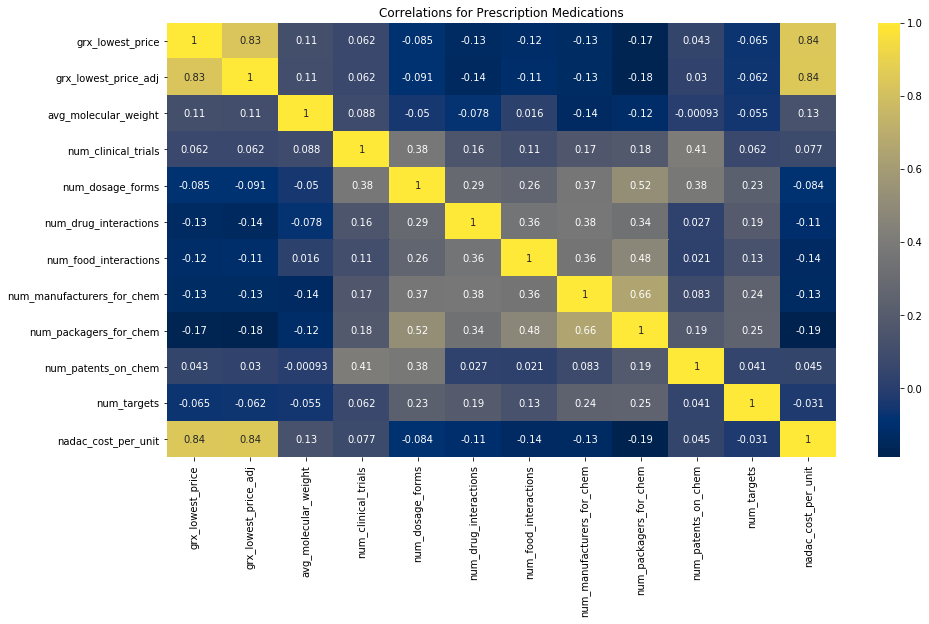

In [21]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), cmap = 'cividis', annot = True)
plt.title('Correlations for Prescription Medications');
plt.savefig('Correlation Matrix for Prescription Medications.png')

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


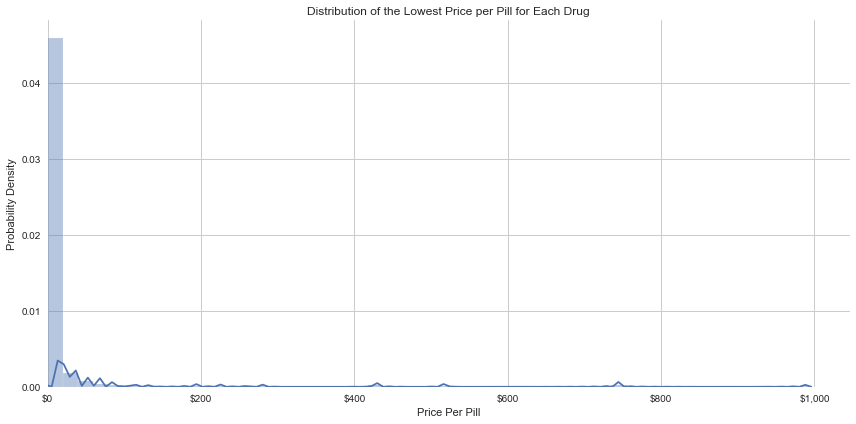

In [24]:
# created visualization for price distribution of all remaining drugs in the dataframe.
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

x = pd.Series(df['grx_lowest_price_adj'], name = 'grx_lowest_price_adj')
ax = sns.distplot(x)
ax.set_title("Distribution of the Lowest Price per Pill for Each Drug")
ax.xaxis.set_major_formatter(tick) 
ax.set_ylabel('Probability Density')
ax.set_xlabel('Price Per Pill');
plt.xlim(0)

plt.tight_layout()
plt.savefig('pill_price_distribution.png')

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


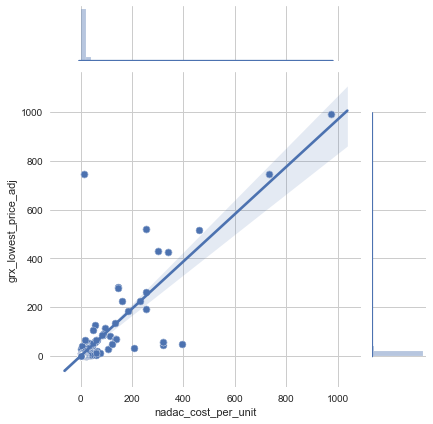

In [30]:
ax = sns.jointplot(x = 'nadac_cost_per_unit',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


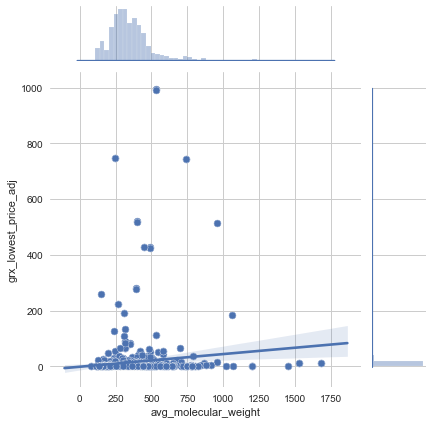

In [31]:
ax = sns.jointplot(x = 'avg_molecular_weight',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


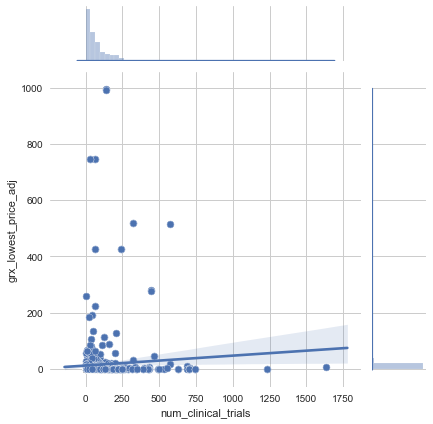

In [32]:
ax = sns.jointplot(x = 'num_clinical_trials',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


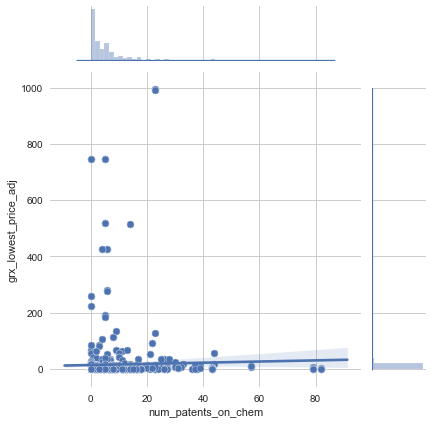

In [33]:
ax = sns.jointplot(x = 'num_patents_on_chem',  y = 'grx_lowest_price_adj', 
                   data = df, kind = 'scatter')
# ax.set_title('_______')
# ax.set_axis_labels('_______')
ax.plot(sns.regplot, sns.distplot);
ax.plot_joint(plt.scatter, edgecolor = "white");

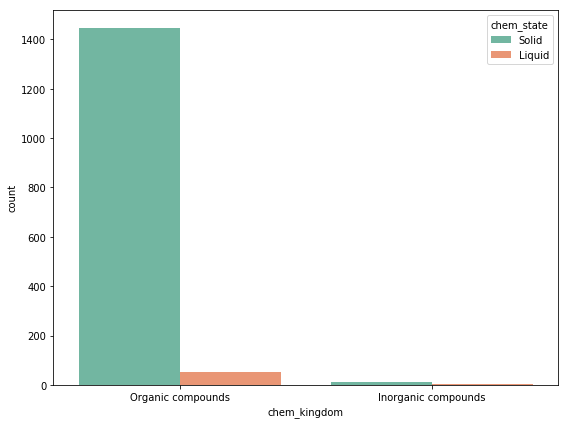

In [49]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(x = 'chem_kingdom', hue = 'chem_state',
                 data = df, palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('Average Molecular Weight')
# ax.set_ylabel('GRX Lowest Price (Adjusted)')
# ax.set_xticklabels('_______', 
#                    rotation = 45, ha = "right")

plt.tight_layout()

In [26]:
aggregations = {
    'grx_lowest_price_adj': 'mean',
    'drug_name': 'count'
    }

df_2 = df.groupby(['chem_class']).agg(aggregations).reset_index()

In [27]:
df_2.sort_values(by = 'grx_lowest_price_adj', ascending = True).head()

,chem_class,grx_lowest_price_adj,drug_name
53,Lactones,0.133333,3
17,Benzothiadiazoles,0.156556,2
32,Coumarins and derivatives,0.235667,2
72,Phenols,0.238667,5
43,Furofurans,0.250778,4


In [28]:
aggregations = {
    'num_drug_interactions': 'mean',
    }

df_3 = df.groupby(['drug_type', 'chem_state']).agg(aggregations).reset_index()

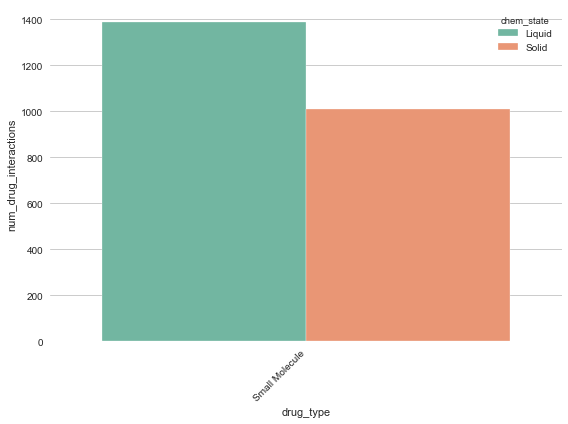

In [29]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x = 'drug_type', y = 'num_drug_interactions',
                    data = df_3, hue = 'chem_state', palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('_______')
# ax.set_ylabel('_______')
ax.set_xticklabels(df3['drug_type'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

In [50]:
aggregations = {
    'grx_lowest_price_adj': 'mean',
    }

df4 = df.groupby(['chem_kingdom', 'chem_state']).agg(aggregations).reset_index()

In [51]:
df4.sort_values(by = 'grx_lowest_price_adj', ascending = True).head()

,chem_kingdom,chem_state,grx_lowest_price_adj
0,Inorganic compounds,Liquid,2.085000
1,Inorganic compounds,Solid,14.351720
3,Organic compounds,Solid,55.598534
2,Organic compounds,Liquid,173.117713


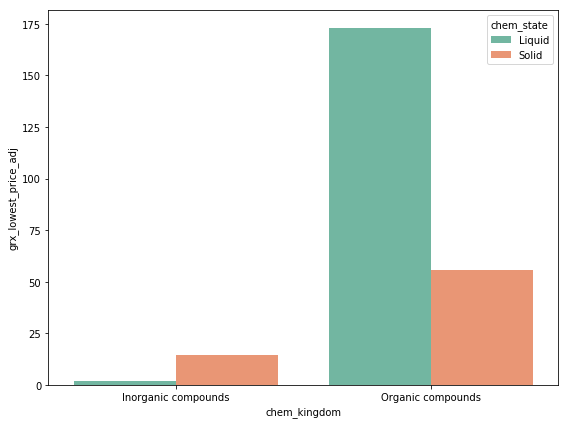

In [52]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x = 'chem_kingdom', y = 'grx_lowest_price_adj', hue = 'chem_state',
                 data = df4, palette = 'Set2')
# ax.set_title('_______')
# ax.set_xlabel('Average Molecular Weight')
# ax.set_ylabel('GRX Lowest Price (Adjusted)')
# ax.set_xticklabels('_______', 
#                    rotation = 45, ha = "right")

plt.tight_layout()

In [55]:
nadac_year_df.head()

,year,OTC,NADAC_Per_Unit
0,2013,N,2.358686e+06
1,2013,Y,1.692711e+04
2,2014,N,1.047638e+07
3,2014,Y,5.406013e+04
4,2015,N,1.186847e+07
5,2015,Y,6.338715e+04
6,2016,N,1.131926e+07
7,2016,Y,5.598029e+04
8,2017,N,1.190788e+07
9,2017,Y,5.909460e+04


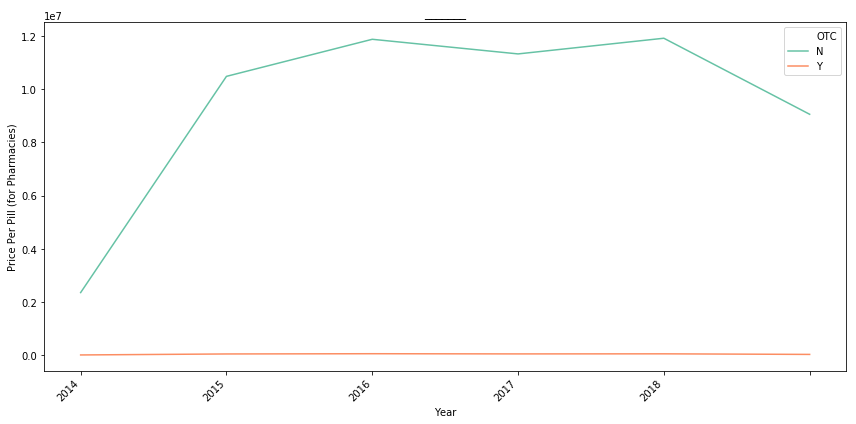

In [56]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x = 'year',  y = 'NADAC_Per_Unit', hue = 'OTC',
                 data = nadac_year_df, palette = 'Set2')
ax.set_title('_______')
ax.set_xlabel('Year')
ax.set_ylabel('Price Per Pill (for Pharmacies)')
ax.set_xticklabels(nadac_year_df['year'].unique(),
                   rotation = 45, ha = "right")

plt.tight_layout()

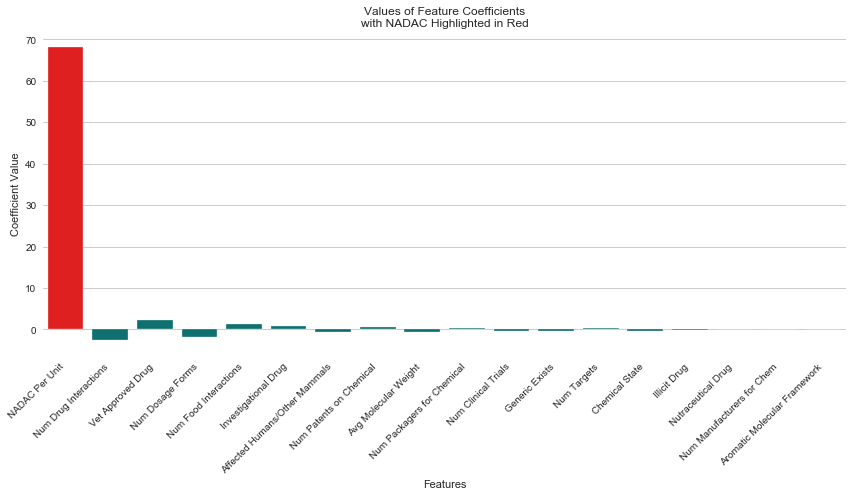

In [37]:
# graphed final beta values by feature.
features = ['NADAC Per Unit', 'Num Drug Interactions', 'Vet Approved Drug',
            'Num Dosage Forms', 'Num Food Interactions', 'Investigational Drug', 
            'Affected Humans/Other Mammals','Num Patents on Chemical','Avg Molecular Weight',
            'Num Packagers for Chemical', 'Num Clinical Trials', 'Generic Exists', 
            'Num Targets', 'Chemical State', 'Illicit Drug', 'Nutraceutical Drug',
            'Num Manufacturers for Chem', 'Aromatic Molecular Framework']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

clrs = ['red' if (x == 'nadac_cost_per_unit') else 'teal' for x in cdf.sort_values(by = 'abs_effect', ascending = False).reset_index()['index']]
ax = sns.barplot(x = 'index',  y = 'effect', palette = clrs,
                 data = cdf.sort_values(by = 'abs_effect', ascending = False).reset_index(), color = 'Teal')
ax.set_title('Values of Feature Coefficients\nwith NADAC Highlighted in Red')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_xticklabels(features, 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig('coefficients_w_cost.png')